In [19]:
import pandas as pd
prices_day_0 = pd.read_csv('prices_round_3_day_0.csv', delimiter=';')
prices_day_1 = pd.read_csv('prices_round_3_day_1.csv', delimiter=';')
prices_day_2 = pd.read_csv('prices_round_3_day_2.csv', delimiter=';')
trades_day_0 = pd.read_csv('trades_round_3_day_0_nn.csv', delimiter=';')
trades_day_1 = pd.read_csv('trades_round_3_day_1_nn.csv', delimiter=';')
trades_day_2 = pd.read_csv('trades_round_3_day_2_nn.csv', delimiter=';')


In [22]:
## Display the first few rows of each dataset
print("Prices Day 0:")
print(prices_day_0.head())
print("\nPrices Day 1:")
print(prices_day_1.head())
print("\nPrices Day 2:")
print(prices_day_2.head())
print("\nTrades Day 0:")
print(trades_day_0.head())
print("\nTrades Day 1:")
print(trades_day_1.head())
print("\nTrades Day 2:")
print(trades_day_2.head())

# Summary statistics for each dataset
print("Summary of Prices Day 0:")
print(prices_day_0.describe())
print("\nSummary of Trades Day 0:")
print(trades_day_0.describe())


Prices Day 0:
   day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0    0          0     CHOCOLATE         7999           111          NaN   
1    0          0  STRAWBERRIES         3999           210          NaN   
2    0          0         ROSES        14999            72          NaN   
3    0          0   GIFT_BASKET        71348            19      71347.0   
4    0        100   GIFT_BASKET        71344             1      71343.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0           NaN          NaN           NaN         8001           111   
1           NaN          NaN           NaN         4001           210   
2           NaN          NaN           NaN        15001            72   
3          24.0          NaN           NaN        71362            19   
4          12.0      71342.0          20.0        71355             1   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           N

In [23]:
# Check for missing values
print("Missing values in Prices Day 0:")
print(prices_day_0.isnull().sum())
print("\nMissing values in Trades Day 0:")
print(trades_day_0.isnull().sum())

# Check for duplicates
print("Duplicates in Prices Day 0:")
print(prices_day_0.duplicated().sum())
print("\nDuplicates in Trades Day 0:")
print(trades_day_0.duplicated().sum())


Missing values in Prices Day 0:
day                    0
timestamp              0
product                0
bid_price_1            0
bid_volume_1           0
bid_price_2        21665
bid_volume_2       21665
bid_price_3        33258
bid_volume_3       33258
ask_price_1            0
ask_volume_1           0
ask_price_2        21734
ask_volume_2       21734
ask_price_3        33246
ask_volume_3       33246
mid_price              0
profit_and_loss        0
dtype: int64

Missing values in Trades Day 0:
timestamp       0
buyer        3855
seller       3855
symbol          0
currency        0
price           0
quantity        0
dtype: int64
Duplicates in Prices Day 0:
0

Duplicates in Trades Day 0:
0


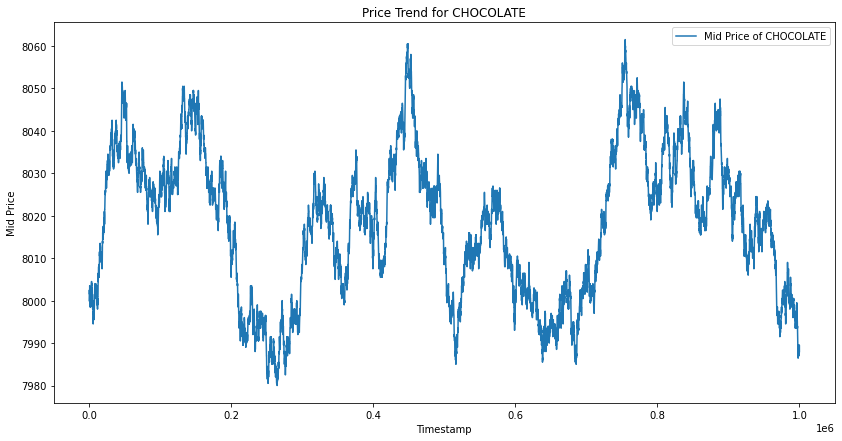

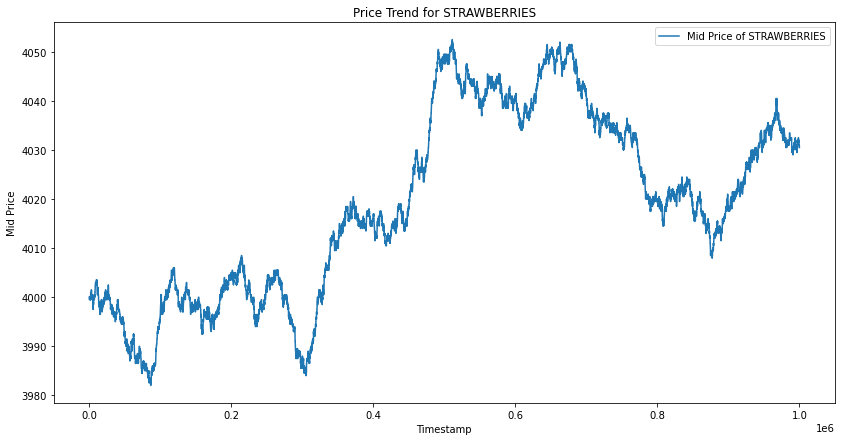

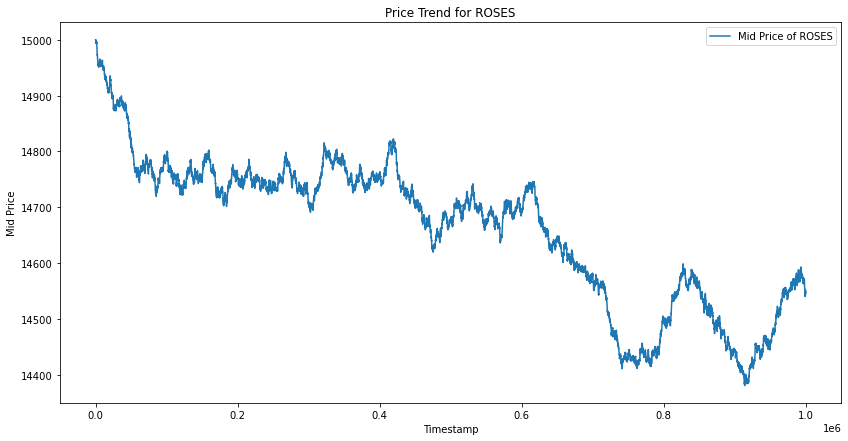

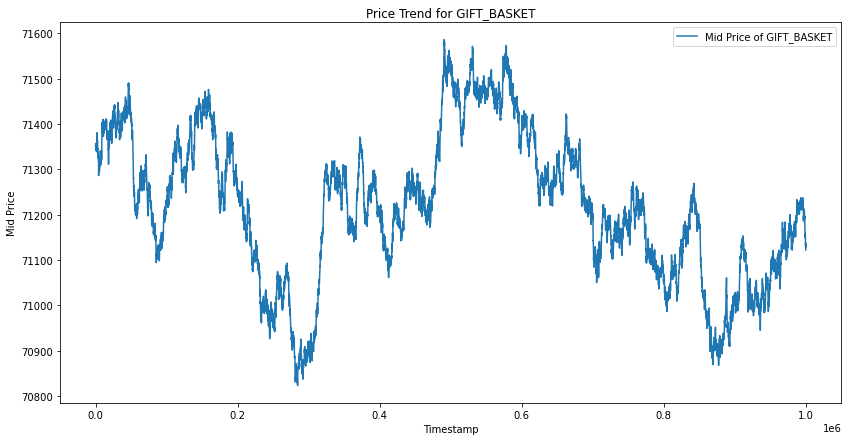

In [24]:
import matplotlib.pyplot as plt

# Function to plot price trends
def plot_price_trends(data, product_name):
    filtered_data = data[data['product'] == product_name]
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_data['timestamp'], filtered_data['mid_price'], label=f'Mid Price of {product_name}')
    plt.title(f'Price Trend for {product_name}')
    plt.xlabel('Timestamp')
    plt.ylabel('Mid Price')
    plt.legend()
    plt.show()

# Call this function for each product
plot_price_trends(prices_day_0, 'CHOCOLATE')
plot_price_trends(prices_day_0, 'STRAWBERRIES')
plot_price_trends(prices_day_0, 'ROSES')
plot_price_trends(prices_day_0, 'GIFT_BASKET')


In [26]:
# Example of calculating correlations between product prices
prices_day_0['CHOCOLATE_price'] = prices_day_0[prices_day_0['product'] == 'CHOCOLATE']['mid_price']
prices_day_0['STRAWBERRIES_price'] = prices_day_0[prices_day_0['product'] == 'STRAWBERRIES']['mid_price']
prices_day_0['ROSES_price'] = prices_day_0[prices_day_0['product'] == 'ROSES']['mid_price']
prices_day_0['GIFT_BASKET_price'] = prices_day_0[prices_day_0['product'] == 'GIFT_BASKET']['mid_price']

print(prices_day_0[['CHOCOLATE_price', 'STRAWBERRIES_price', 'ROSES_price', 'GIFT_BASKET_price']].corr())


                    CHOCOLATE_price  STRAWBERRIES_price  ROSES_price  \
CHOCOLATE_price                 1.0                 NaN          NaN   
STRAWBERRIES_price              NaN                 1.0          NaN   
ROSES_price                     NaN                 NaN          1.0   
GIFT_BASKET_price               NaN                 NaN          NaN   

                    GIFT_BASKET_price  
CHOCOLATE_price                   NaN  
STRAWBERRIES_price                NaN  
ROSES_price                       NaN  
GIFT_BASKET_price                 1.0  


In [27]:
# Summary statistics of trade volumes for each product
print("Trade Volume Stats for CHOCOLATE:")
print(trades_day_0[trades_day_0['symbol'] == 'CHOCOLATE']['quantity'].describe())
print("Trade Volume Stats for STRAWBERRIES:")
print(trades_day_0[trades_day_0['symbol'] == 'STRAWBERRIES']['quantity'].describe())
print("Trade Volume Stats for ROSES:")
print(trades_day_0[trades_day_0['symbol'] == 'ROSES']['quantity'].describe())
print("Trade Volume Stats for GIFT_BASKET:")
print(trades_day_0[trades_day_0['symbol'] == 'GIFT_BASKET']['quantity'].describe())


Trade Volume Stats for CHOCOLATE:
count    964.000000
mean       6.655602
std        1.354068
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: quantity, dtype: float64
Trade Volume Stats for STRAWBERRIES:
count    1225.000000
mean        7.124898
std         2.311503
min         3.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        12.000000
Name: quantity, dtype: float64
Trade Volume Stats for ROSES:
count    1089.000000
mean        3.333333
std         1.916933
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: quantity, dtype: float64
Trade Volume Stats for GIFT_BASKET:
count    577.000000
mean       3.173310
std        2.461745
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       10.000000
Name: quantity, dtype: float64


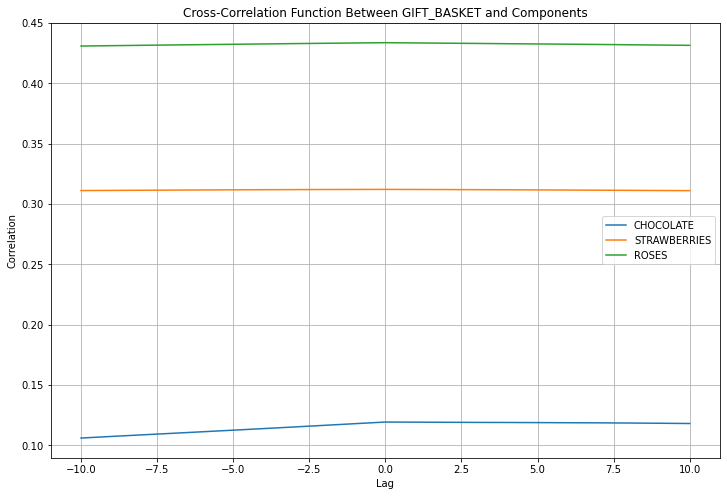

In [28]:
# Create a DataFrame with just the necessary columns
data = prices_day_0.pivot(index='timestamp', columns='product', values='mid_price')

# Drop rows with any NaN values to align data
data.dropna(inplace=True)

# Function to compute cross-correlation between two time series
def cross_correlation(series1, series2, lag=10):  # Adjust 'lag' to your specific dataset's needs
    correlation = [series1.corr(series2.shift(i)) for i in range(-lag, lag+1)]
    return correlation

# Calculate cross-correlation
lag_range = 10  # or any other value that seems appropriate based on your data's frequency
chocolate_cc = cross_correlation(data['GIFT_BASKET'], data['CHOCOLATE'], lag=lag_range)
strawberries_cc = cross_correlation(data['GIFT_BASKET'], data['STRAWBERRIES'], lag=lag_range)
roses_cc = cross_correlation(data['GIFT_BASKET'], data['ROSES'], lag=lag_range)

# Plotting cross-correlation results

lags = range(-lag_range, lag_range + 1)
plt.figure(figsize=(12, 8))
plt.plot(lags, chocolate_cc, label='CHOCOLATE')
plt.plot(lags, strawberries_cc, label='STRAWBERRIES')
plt.plot(lags, roses_cc, label='ROSES')
plt.title('Cross-Correlation Function Between GIFT_BASKET and Components')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

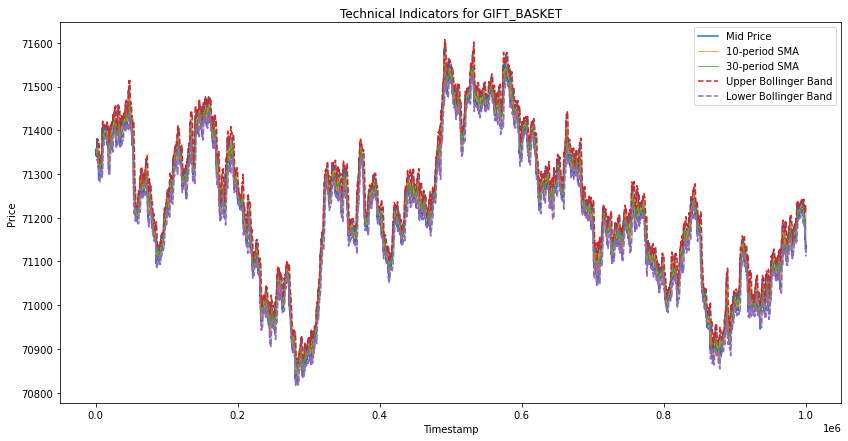

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'mid_price' for 'GIFT_BASKET'
data = prices_day_0[prices_day_0['product'] == 'GIFT_BASKET'].copy()
data.set_index('timestamp', inplace=True)

# Calculate moving averages
data['SMA_10'] = data['mid_price'].rolling(window=10).mean()
data['SMA_30'] = data['mid_price'].rolling(window=30).mean()

# Calculate RSI
delta = data['mid_price'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
data['middle_band'] = data['mid_price'].rolling(window=20).mean()
data['std_dev'] = data['mid_price'].rolling(window=20).std()
data['upper_band'] = data['middle_band'] + (data['std_dev'] * 2)
data['lower_band'] = data['middle_band'] - (data['std_dev'] * 2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['mid_price'], label='Mid Price')
plt.plot(data['SMA_10'], label='10-period SMA', linewidth=0.75)
plt.plot(data['SMA_30'], label='30-period SMA', linewidth=0.75)
plt.plot(data['upper_band'], label='Upper Bollinger Band', linestyle='--')
plt.plot(data['lower_band'], label='Lower Bollinger Band', linestyle='--')
plt.fill_between(data.index, data['lower_band'], data['upper_band'], color='grey', alpha=0.3)
plt.title('Technical Indicators for GIFT_BASKET')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


In [31]:
# Assuming you have a DataFrame 'trades' with 'timestamp' and 'quantity'
# Summing up quantities per timestamp for simplification
volume_data = trades[trades['symbol'] == 'GIFT_BASKET'].groupby('timestamp')['quantity'].sum().reset_index()

# Merging with your existing price data
data = pd.merge(data, volume_data, on='timestamp', how='left').fillna(0)  # fill missing volumes with 0

# Now plotting price with volume
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 10))
ax1.plot(data['timestamp'], data['mid_price'], label='Mid Price')
ax1.set_title('Price and Volume Chart for GIFT_BASKET')
ax1.set_ylabel('Mid Price')
ax1.legend()

ax2.bar(data['timestamp'], data['quantity'], color='grey', alpha=0.3)
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Volume')
ax2.legend(['Volume'])
plt.show()



NameError: name 'trades' is not defined